#Assignment 11: Image Classification Using Random Forest
Dataset Selection: CIFAR-10
The CIFAR-10 dataset is ideal because:

Publicly available and widely used

Contains 60,000 32x32 color images

10 classes with 6,000 images per class

In [11]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Dataset Selection and Preprocessing
print("Loading and preprocessing dataset...")

# Load CIFAR-10 dataset
cifar_10 = fetch_openml('CIFAR_10', version=1, as_frame=False, parser='auto')
X, y = cifar_10.data, cifar_10.target

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

# Normalize pixel values (0-255 to 0-1)
X = X.astype('float32') / 255.0

# Since CIFAR-10 is large, let's use a subset for faster training
sample_size = 10000  # Use 10,000 samples for demonstration
indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X[indices]
y_sample = y[indices]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Loading and preprocessing dataset...
Dataset shape: (60000, 3072)
Number of classes: 10
Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Training set shape: (8000, 3072)
Test set shape: (2000, 3072)


Task 2: Model Training

In [15]:
import time

# OPTIMIZED RANDOM FOREST
print("\n=== TRAINING OPTIMIZED RANDOM FOREST ===")
start_time = time.time()

# Simplified parameter grid for faster training
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use fewer CV folds
grid_search_rf = GridSearchCV(
    rf_classifier, param_grid_rf, cv=2, scoring='accuracy', n_jobs=-1, verbose=1
)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

rf_time = time.time() - start_time
print(f"Random Forest training completed in {rf_time:.2f} seconds")
print(f"Best parameters: {grid_search_rf.best_params_}")


=== TRAINING OPTIMIZED RANDOM FOREST ===
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Random Forest training completed in 171.19 seconds
Best parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}


Task 3: Model Evaluation

In [18]:
# Model Evaluation - Random Forest
print("\nRandom Forest Evaluation:")
y_pred_rf = best_rf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Calculation
cm_rf = confusion_matrix(y_test, y_pred_rf)



Random Forest Evaluation:
Accuracy: 0.4085
Precision: 0.4040
Recall: 0.4085
F1-Score: 0.4037

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       202
           1       0.46      0.44      0.45       199
           2       0.34      0.29      0.31       208
           3       0.30      0.21      0.25       201
           4       0.29      0.31      0.30       193
           5       0.36      0.33      0.34       198
           6       0.41      0.56      0.47       198
           7       0.46      0.41      0.43       211
           8       0.50      0.54      0.52       195
           9       0.45      0.51      0.48       195

    accuracy                           0.41      2000
   macro avg       0.40      0.41      0.40      2000
weighted avg       0.40      0.41      0.40      2000



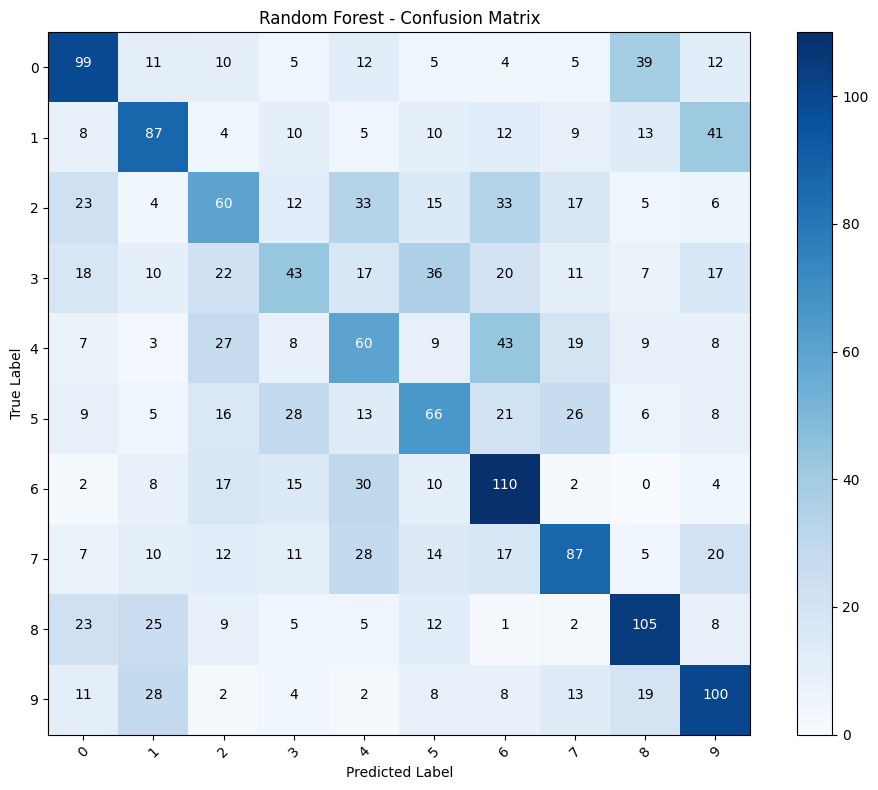

In [19]:
# Plot 1: Confusion Matrix
plt.figure(figsize=(10, 8)) # Create a new figure for the confusion matrix
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest - Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm_rf.max() / 2.
for i, j in np.ndindex(cm_rf.shape):
    plt.text(j, i, format(cm_rf[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_rf[i, j] > thresh else "black")
plt.tight_layout()
plt.show() # Display the confusion matrix figure

#Task 4: Feature Importance

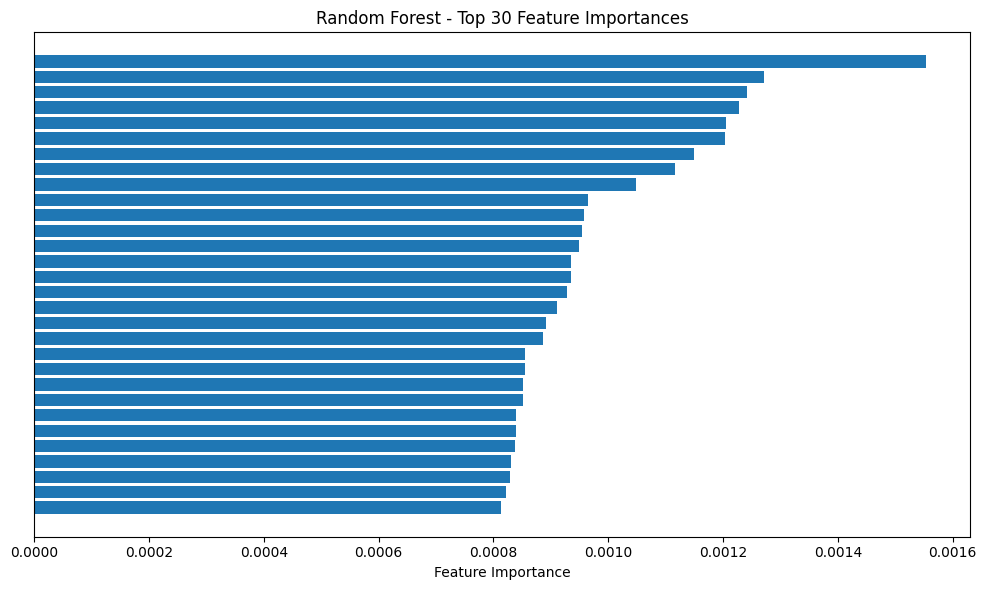

In [20]:
# Feature Importance Visualization
feature_importances = best_rf.feature_importances_

# Plot 2: Feature Importances
plt.figure(figsize=(10, 6)) # Create a new figure for feature importances
# Since we have 3072 features (32x32x3), let's show top 30
top_indices = np.argsort(feature_importances)[-30:]
plt.barh(range(30), feature_importances[top_indices])
plt.title('Random Forest - Top 30 Feature Importances')
plt.xlabel('Feature Importance')
plt.yticks([])  # Remove y ticks as they represent pixel positions

plt.tight_layout()
plt.show() # Display the feature importances figure

#Task 5: Prediction on New Image


PREDICTION ON NEW IMAGE
True label: 4
Random Forest prediction: 8


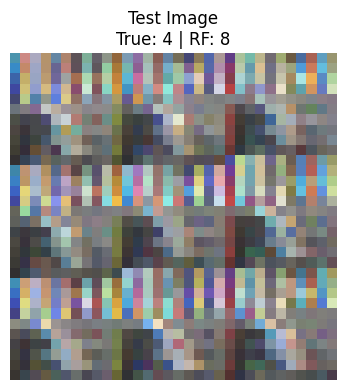

In [22]:
# Prediction on New Images
def predict_new_image(model, image_array, class_names):
    """
    Predict the class of a new image using the trained model

    Parameters:
    model: trained classifier
    image_array: numpy array of the image (flattened)
    class_names: list of class names

    Returns:
    predicted_class: string of predicted class
    """
    # Ensure the image is normalized
    if image_array.max() > 1:
        image_array = image_array.astype('float32') / 255.0

    # Reshape if necessary (for single image prediction)
    if len(image_array.shape) == 1:
        image_array = image_array.reshape(1, -1)

    # Make prediction
    prediction = model.predict(image_array)
    predicted_class = class_names[int(prediction[0])]

    return predicted_class

# Test the prediction function with a random test image
print("\n" + "="*50)
print("PREDICTION ON NEW IMAGE")
print("="*50)

# Select a random test image
random_idx = np.random.randint(0, len(X_test))
test_image = X_test[random_idx]
true_label = y_test[random_idx]

# Predict using Random Forest model
predicted_rf = predict_new_image(best_rf, test_image, np.unique(y))
# predicted_svm = predict_new_image(best_svm, test_image, np.unique(y)) # SVM not yet trained

print(f"True label: {true_label}")
print(f"Random Forest prediction: {predicted_rf}")
# print(f"SVM prediction: {predicted_svm}") # SVM not yet trained

# Display the test image
plt.figure(figsize=(8, 4))

# Reshape image to original dimensions (assuming 32x32x3 for CIFAR-10)
if len(test_image) == 3072:  # 32*32*3
    image_reshaped = test_image.reshape(32, 32, 3)
    plt.imshow(image_reshaped)
    plt.title(f'Test Image\nTrue: {true_label} | RF: {predicted_rf}')
    plt.axis('off')
else:
    # For other image dimensions
    side_length = int(np.sqrt(len(test_image) // 3))
    if side_length * side_length * 3 == len(test_image):
        image_reshaped = test_image.reshape(side_length, side_length, 3)
        plt.imshow(image_reshaped)
        plt.title(f'Test Image\nTrue: {true_label} | RF: {predicted_rf}')
        plt.axis('off')

plt.tight_layout()
plt.show()

#Task 6: Comparison with SVM


SVM CLASSIFICATION
Training SVM on subset of data...
Performing Grid Search for SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVM:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Evaluation:
Accuracy: 0.3325
Precision: 0.3329
Recall: 0.3325
F1-Score: 0.3268

MODEL COMPARISON
Model           Accuracy   Precision  Recall     F1-Score  
-------------------------------------------------------
Random Forest   0.4085     0.4040     0.4085     0.4037    
SVM             0.3325     0.3329     0.3325     0.3268    


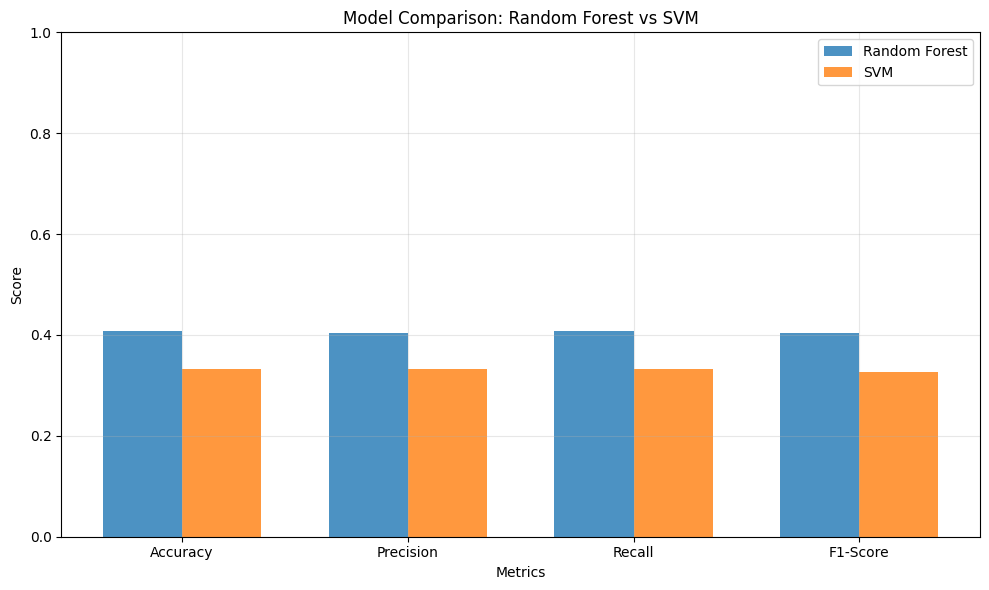

In [24]:
# Bonus: Comparing with SVM
print("\n" + "="*50)
print("SVM CLASSIFICATION")
print("="*50)

# Use a smaller subset for SVM as it's computationally expensive
svm_sample_size = 500
indices_svm = np.random.choice(len(X_train), svm_sample_size, replace=False)
X_train_svm = X_train[indices_svm]
y_train_svm = y_train[indices_svm]

print("Training SVM on subset of data...")

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create SVM classifier
svm_classifier = SVC(random_state=42)

# Perform Grid Search
print("Performing Grid Search for SVM...")
grid_search_svm = GridSearchCV(
    svm_classifier, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search_svm.fit(X_train_svm, y_train_svm)

# Get best parameters and model
print("Best parameters for SVM:")
print(grid_search_svm.best_params_)
best_svm = grid_search_svm.best_estimator_

# Train the best model
best_svm.fit(X_train_svm, y_train_svm)

# Model Evaluation - SVM
print("\nSVM Evaluation:")
y_pred_svm = best_svm.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

# Model Comparison
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

comparison_data = {
    'Model': ['Random Forest', 'SVM'],
    'Accuracy': [accuracy_rf, accuracy_svm],
    'Precision': [precision_rf, precision_svm],
    'Recall': [recall_rf, recall_svm],
    'F1-Score': [f1_rf, f1_svm]
}

# Print comparison table
print(f"{'Model':<15} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 55)
for i in range(2):
    print(f"{comparison_data['Model'][i]:<15} "
          f"{comparison_data['Accuracy'][i]:<10.4f} "
          f"{comparison_data['Precision'][i]:<10.4f} "
          f"{comparison_data['Recall'][i]:<10.4f} "
          f"{comparison_data['F1-Score'][i]:<10.4f}")

# Visualization of comparison
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, [accuracy_rf, precision_rf, recall_rf, f1_rf],
        width, label='Random Forest', alpha=0.8)
plt.bar(x + width/2, [accuracy_svm, precision_svm, recall_svm, f1_svm],
        width, label='SVM', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison: Random Forest vs SVM')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()